In [21]:
# Import pandas library and the data set
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [22]:
# Have a look at the first five rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [23]:
# Have a look at the data set's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [24]:
# Check if any columns having missing data
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc = StandardScaler()

# Retrieve X_scaled and y
X = df.drop('DEATH_EVENT', axis=1).copy()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
y = df['DEATH_EVENT'].copy()

In [26]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1, stratify=y)

## Preliminary use of Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=1)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

[Text(332.45970394736844, 413.13599999999997, 'time <= -0.81\ngini = 0.437\nsamples = 239\nvalue = [162, 77]\nclass = death in period'),
 Text(110.13157894736842, 369.648, 'ejection_fraction <= 2.913\ngini = 0.226\nsamples = 54\nvalue = [7, 47]\nclass = not death in period'),
 Text(88.10526315789474, 326.15999999999997, 'creatinine_phosphokinase <= -0.518\ngini = 0.201\nsamples = 53\nvalue = [6, 47]\nclass = not death in period'),
 Text(44.05263157894737, 282.672, 'serum_sodium <= -0.482\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = not death in period'),
 Text(22.026315789473685, 239.184, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = not death in period'),
 Text(66.07894736842105, 239.184, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = death in period'),
 Text(132.1578947368421, 282.672, 'diabetes <= 0.166\ngini = 0.124\nsamples = 45\nvalue = [3, 42]\nclass = not death in period'),
 Text(110.13157894736842, 239.184, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]\nclass = not 

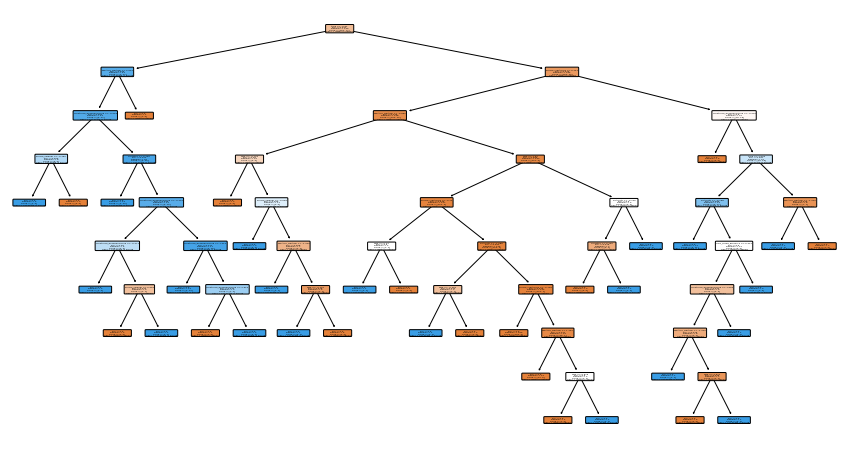

In [28]:
# Plot the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(decisiontree, filled=True, rounded=True, class_names=['death in period', 'not death in period'], feature_names=X.columns)

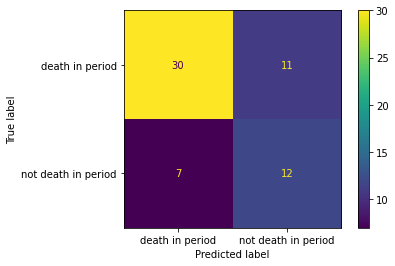

In [29]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix, f1_score
plot_confusion_matrix(decisiontree, X_test, y_test, display_labels=['death in period', 'not death in period'])

We see that<br> 
- of **(30 + 11) = 42** people that die in period, **30 (73%)** were correctly classified.<br>
- of **(7 + 12) = 19** people that did not die in period, **12 (33%)** were correctly classified.
<br>Let's prune the tree to improve the model

In [30]:
# Create lists of parameter for Decision Tree Classifier
parameters = {  'criterion': ['gini'],
                'max_depth': [5],
                'splitter': ['random'],
                'min_samples_split': [6],
                'min_samples_leaf': [9],
                'max_leaf_nodes': [3],
                'max_features': ['sqrt']
}

### Conduct Parameter Optmization With GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Create a grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X, y)

# View The Best Parameters
print(grid_search.best_params_)
best_result = DecisionTreeClassifier(**grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_samples_leaf': 9, 'min_samples_split': 6, 'splitter': 'random'}


## Find the best ccp_alpha

<AxesSubplot:xlabel='alpha'>

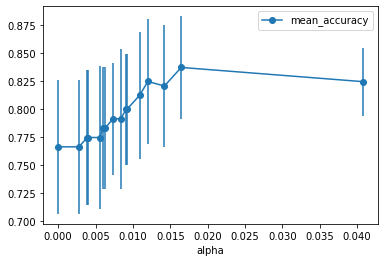

In [32]:
path = decisiontree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o')

We can see that the best alpha is between 0.015 and 0.017

In [33]:
ideal_cpp_alpha = alpha_results[(alpha_results.alpha > 0.015) & (alpha_results.alpha < 0.017)].alpha
ideal_cpp_alpha = float(ideal_cpp_alpha)

In [34]:
ideal_cpp_alpha

0.016457994286810003

## Rebuild the Tree model using the best parameters

In [35]:
final_tree = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=3, 
                                    max_features='sqrt', 
                                    max_leaf_nodes=3, 
                                    min_samples_leaf=9, 
                                    min_samples_split=6, 
                                    splitter='random', 
                                    ccp_alpha=ideal_cpp_alpha)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016457994286810003, max_depth=3,
                       max_features='sqrt', max_leaf_nodes=3,
                       min_samples_leaf=9, min_samples_split=6,
                       splitter='random')

[Text(502.20000000000005, 362.4, 'time <= 0.065\ngini = 0.437\nsamples = 239\nvalue = [162, 77]\nclass = death in period'),
 Text(334.8, 217.44, 'time <= -0.751\ngini = 0.499\nsamples = 133\nvalue = [70, 63]\nclass = death in period'),
 Text(167.4, 72.47999999999996, 'gini = 0.289\nsamples = 57\nvalue = [10, 47]\nclass = not death in period'),
 Text(502.20000000000005, 72.47999999999996, 'gini = 0.332\nsamples = 76\nvalue = [60, 16]\nclass = death in period'),
 Text(669.6, 217.44, 'gini = 0.229\nsamples = 106\nvalue = [92, 14]\nclass = death in period')]

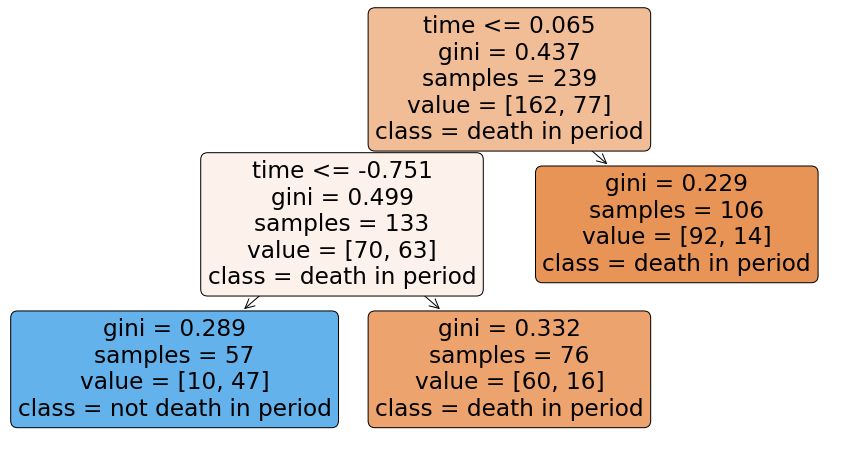

In [36]:
# Plot the tree
plt.figure(figsize=(15, 8))
plot_tree(final_tree, filled=True, rounded=True, class_names=['death in period', 'not death in period'], feature_names=X.columns)

Accuracy: 0.866667
Precision: 0.736842
Recall: 0.823529
F1 score: 0.777778


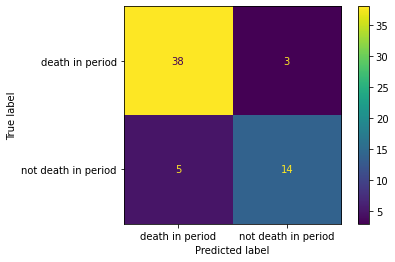

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Plot the confusion matrix
plot_confusion_matrix(final_tree, X_test, y_test, display_labels=['death in period', 'not death in period'])
predictions = final_tree.predict(X_test)

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(predictions, y_test)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(predictions, y_test)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(predictions, y_test)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(predictions, y_test)
print('F1 score: %f' % f1)